<a href="https://colab.research.google.com/github/Nikita921999/project/blob/main/Copy_of_Efficient_Frontier_Short_sell_allowed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import random

In [80]:
n = int(input("Enter the number of stocks in your universe (between 10 and 50): "))
risk_free_rate = float(input("Enter the risk free rate "))

Enter the number of stocks in your universe (between 10 and 50): 10
Enter the risk free rate 6.9


#Returns 


In [81]:
# Load the dataset into a Pandas DataFrame and calculate weekly returns

df = pd.read_csv('/content/Fifty_stocks.csv')
df=df.drop('Date',axis=1)
# select n random stocks from dataframe
# stocks = random.sample(list(df.columns), n)
# returns = df[stocks].pct_change().dropna()
stocks = df.loc[:, random.sample(list(df.columns), n)]
returns = df[stocks.columns].pct_change().dropna()


In [82]:
returns

,VEDL.NS,KOTAKBANK.NS,TCS.NS,TATASTEEL.NS,EICHERMOT.NS,APOLLOHOSP.NS,JINDALSTEL.NS,UPL.NS,AXISBANK.NS,HAVELLS.NS
1,0.019472,-0.010911,0.162887,0.024811,-0.033512,-0.034380,-0.000220,0.015625,0.014286,-0.016812
2,0.027727,0.009140,0.041372,0.013952,-0.078363,-0.002580,-0.006133,-0.011539,-0.012676,-0.002533
3,-0.000600,-0.012180,-0.058456,-0.012950,-0.035365,0.008497,0.244618,-0.046693,0.019971,-0.031111
4,0.068387,-0.029719,-0.011754,-0.006150,0.070203,0.001580,0.020059,0.048980,0.000000,0.011796
5,-0.055587,-0.008200,-0.046050,-0.033416,-0.021866,0.066772,-0.002526,0.058366,-0.009790,-0.020078
...,...,...,...,...,...,...,...,...,...,...
1069,-0.011454,-0.004634,0.015866,-0.095970,-0.031462,0.038727,-0.002317,0.015649,-0.017392,0.003384
1070,0.010621,-0.007223,-0.010290,0.031710,0.022616,0.044936,0.015138,0.059499,-0.014240,0.021733
1071,-0.062261,-0.035214,-0.028762,-0.022272,-0.024170,-0.029907,-0.050500,-0.041356,-0.004094,-0.037611
1072,-0.017660,0.031638,-0.017145,-0.025057,-0.024426,-0.013947,0.051312,-0.038331,0.001468,0.020451


In [84]:
# Define a lambda function to multiply each value by 100
multiply_by_100 = lambda x: x * 100

# Apply the lambda function to all columns of the DataFrame
returns = returns.apply(multiply_by_100)

# Print the updated DataFrame
print(returns.head())

    VEDL.NS  KOTAKBANK.NS     TCS.NS  TATASTEEL.NS  EICHERMOT.NS  \
1  1.947224     -1.091052  16.288650      2.481075     -3.351212   
2  2.772684      0.913973   4.137206      1.395159     -7.836328   
3 -0.059966     -1.217993  -5.845644     -1.295018     -3.536507   
4  6.838664     -2.971861  -1.175447     -0.615018      7.020305   
5 -5.558681     -0.820038  -4.605046     -3.341567     -2.186602   

   APOLLOHOSP.NS  JINDALSTEL.NS    UPL.NS  AXISBANK.NS  HAVELLS.NS  
1      -3.437978      -0.022041  1.562516     1.428565   -1.681202  
2      -0.257963      -0.613312 -1.153865    -1.267599   -0.253310  
3       0.849691      24.461759 -4.669256     1.997133   -3.111110  
4       0.157958       2.005876  4.897954     0.000000    1.179581  
5       6.677186      -0.252595  5.836604    -0.979014   -2.007782  


#Mean and variance of returns


In [85]:
# Calculate the variance of each feature and store in a Pandas Series
means= returns.mean()
variances = returns.var()

# Convert the Pandas Series to numpy arrays
means_arr = means.to_numpy()
variances_arr = variances.to_numpy()

# Print the arrays of means and variances
print(means_arr)
print(variances_arr)


[0.79686417 0.64579668 0.61052069 0.5818029  0.74688836 0.53877544
 0.75465394 0.5348388  0.62443006 0.79289476]
[48.26046577 28.18220566 49.84095918 43.34650136 30.7274952  21.67367412
 56.05083722 34.69970078 31.54498958 32.11871388]


In [86]:
annualized_returns= means_arr*52
annualized_variance= variances_arr*52

In [87]:
print(annualized_returns)
print(annualized_variance)

[41.43693668 33.58142739 31.74707603 30.25375069 38.83819471 28.01632296
 39.24200469 27.81161766 32.470363   41.23052775]
[2509.54422028 1465.47469434 2591.72987758 2254.01807072 1597.82975044
 1127.03105431 2914.64353546 1804.3844403  1640.33945802 1670.17312164]


#Calculate Excess Returns


In [88]:

# Define a lambda function to subtract the column mean from each value
subtract_mean = lambda x: x - x.mean()

# Apply the lambda function to all columns of the DataFrame
excess_df = returns.apply(subtract_mean)

# Print the updated DataFrame
print(excess_df.head())



    VEDL.NS  KOTAKBANK.NS     TCS.NS  TATASTEEL.NS  EICHERMOT.NS  \
1  1.150360     -1.736848  15.678130      1.899272     -4.098101   
2  1.975819      0.268177   3.526686      0.813356     -8.583216   
3 -0.856830     -1.863789  -6.456164     -1.876821     -4.283395   
4  6.041800     -3.617658  -1.785967     -1.196821      6.273416   
5 -6.355545     -1.465835  -5.215567     -3.923370     -2.933491   

   APOLLOHOSP.NS  JINDALSTEL.NS    UPL.NS  AXISBANK.NS  HAVELLS.NS  
1      -3.976753      -0.776695  1.027678     0.804135   -2.474097  
2      -0.796738      -1.367965 -1.688703    -1.892030   -1.046205  
3       0.310916      23.707105 -5.204095     1.372703   -3.904005  
4      -0.380818       1.251222  4.363115    -0.624430    0.386686  
5       6.138411      -1.007249  5.301765    -1.603445   -2.800677  


##Variance - Covariance Matrix



In [89]:


# Calculate the variance-covariance matrix of the DataFrame
covariance_matrix = returns.cov()

# annualized covariance matrix
ann_covariance_matrix= covariance_matrix*52

# Print the variance-covariance matrix
print(ann_covariance_matrix)


                   VEDL.NS  KOTAKBANK.NS       TCS.NS  TATASTEEL.NS  \
VEDL.NS        2509.544220    689.475259   271.618509   1156.199725   
KOTAKBANK.NS    689.475259   1465.474694   251.905794    666.454681   
TCS.NS          271.618509    251.905794  2591.729878    195.938512   
TATASTEEL.NS   1156.199725    666.454681   195.938512   2254.018071   
EICHERMOT.NS    519.392386    500.672933   187.786797    490.340032   
APOLLOHOSP.NS   343.893750    285.437906   154.684649    301.401864   
JINDALSTEL.NS  1395.709697    840.262590   259.353125   1409.207427   
UPL.NS          742.417553    542.000734   295.513109    626.030419   
AXISBANK.NS     750.700254    779.944579   197.292198    721.906389   
HAVELLS.NS      583.500313    590.135400   333.019851    688.796764   

               EICHERMOT.NS  APOLLOHOSP.NS  JINDALSTEL.NS       UPL.NS  \
VEDL.NS          519.392386     343.893750    1395.709697   742.417553   
KOTAKBANK.NS     500.672933     285.437906     840.262590   542.000734

##Efficient Portfolio using Monte Carlo

In [90]:
import matplotlib.pyplot as plt

# Calculate the mean returns and covariance matrix of the returns
mean_returns = np.mean(returns, axis=0)
cov_matrix = np.cov(returns.T)

#Annualizing
mean_returns=mean_returns*52
cov_matrix = cov_matrix*52



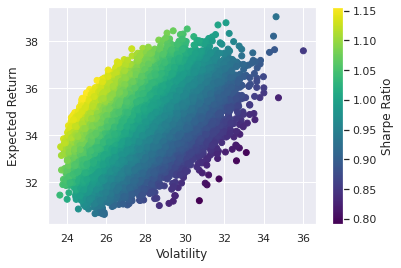

In [91]:


# Define the portfolio_return_volatility() function
def portfolio_return_volatility(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Define the number of simulations to run
num_portfolios = 100000

# Create an empty array to store the results
results = np.zeros((n+3,num_portfolios))

# Generate random weights and calculate portfolio return and volatility for each simulation
for i in range(num_portfolios):
    weights = np.random.random(n)
    weights /= np.sum(weights)
    portfolio_return, portfolio_volatility = portfolio_return_volatility(weights, mean_returns, cov_matrix)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = (results[0,i] - risk_free_rate )/ results[1,i]
    results[3:n+3,i] = weights



# Plot the results
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()




# Minimum Variance Portfolio

In [92]:
min_vol_index = np.argmin(results[1,:])
print(min_vol_index)
print(results[3:n+2,min_vol_index])
print(results[0,min_vol_index],'portfolio_return')
print(results[1,min_vol_index],'portfolio_volatality')
print(results[2,min_vol_index],'sharpe ratio')

23818
[0.00738127 0.08503667 0.11711623 0.08530286 0.13287958 0.30825238
 0.00741853 0.12206959 0.12007997]
31.438665434637574 portfolio_return
23.654599588122423 portfolio_volatality
1.0373739510246904 sharpe ratio


#Max Sharpe Ratio



In [93]:
max_sharpe_index = np.argmax(results[2,:])
print(max_sharpe_index)
print(results[3:n+2,max_sharpe_index])
print(results[0,max_sharpe_index],'portfolio_return')
print(results[1,max_sharpe_index],'portfolio_volatality')
print(results[2,max_sharpe_index],'sharpe ratio')

84628
[0.1078459  0.14509929 0.1053252  0.00453838 0.16062089 0.18404962
 0.03063267 0.0369241  0.01751295]
35.568106555885215 portfolio_return
24.79317169920804 portfolio_volatality
1.1562904054264647 sharpe ratio


#Accomodating the shortselling

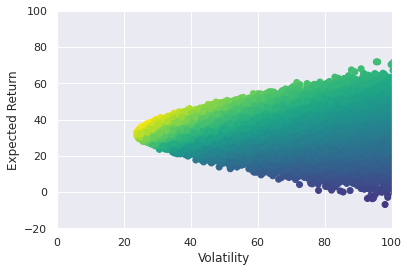

In [94]:
# Define the portfolio_return_volatility() function
def portfolio_return_volatility(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Define the number of simulations to run
num_portfolios = 100000

# Create an empty array to store the results
results = np.zeros((n+3,num_portfolios))

# Generate random weights and calculate portfolio return and volatility for each simulation
for i in range(num_portfolios):

    weights = np.random.randn(n)
    weights= weights/np.sum(weights)
    weights= np.array(weights)

    # Calculate portfolio return and volatility
    portfolio_return, portfolio_volatility = portfolio_return_volatility(weights, mean_returns, cov_matrix)
    # Store the results
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = (results[0,i]-risk_free_rate) / results[1,i]
    results[3:n+3,i] = weights
    
# Plot the results
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.xlabel('Volatility')
plt.xlim(0, 100)
plt.ylim(-20,100)
plt.ylabel('Expected Return')
plt.show()

# Minimum Variance Portfolio



In [95]:
min_vol_index = np.argmin(results[1,:])
print(min_vol_index)
print(results[3:n+2,min_vol_index])
print(results[0,min_vol_index],'portfolio_return')
print(results[1,min_vol_index],'portfolio_volatality')
print(results[2,min_vol_index],'sharpe ratio')

6841
[-0.05984009  0.13036762  0.12029782  0.04925059  0.10664813  0.26361224
  0.03081019  0.13475561  0.08991887]
32.14372175198281 portfolio_return
23.886192788202877 portfolio_volatality
1.0568332080301388 sharpe ratio


In [96]:
sum=0
for i in results[3:n+3,min_vol_index]:
  sum+=i
print(sum)

1.0


#Max Sharpe Ratio

In [97]:
max_sharpe_index = np.argmax(results[2,:])
print(max_sharpe_index)
print(results[3:n+2,max_sharpe_index])
print(results[0,max_sharpe_index],'portfolio_return')
print(results[1,max_sharpe_index],'portfolio_volatality')
print(results[2,max_sharpe_index],'sharpe ratio')

61655
[ 0.07194851  0.09482205  0.12886943  0.01831962  0.2152066   0.18477319
  0.03546807 -0.04801269  0.07474474]
36.05935382316406 portfolio_return
25.17909256319004 portfolio_volatality
1.1580780264413844 sharpe ratio


In [98]:
sum=0
for i in results[3:n+3,max_sharpe_index]:
  sum+=i
print(sum)

1.0


# Efficient Frontier using optimization (QP)

---





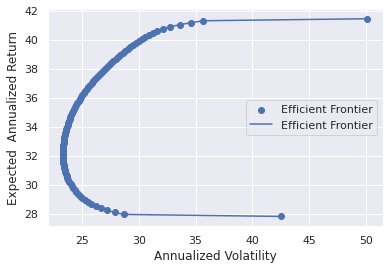

In [99]:
from scipy.optimize import minimize

# Create an array of target portfolio returns for the efficient frontier
target_returns = np.linspace(min(mean_returns), max(mean_returns), num=100)

# Minimize portfolio volatility for each target portfolio return
def portfolio_volatility(weights, mean_returns, cov_matrix, target_return):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility

def portfolio_return_constraint(weights, target_return):
    return np.dot(weights.T, mean_returns) - target_return

efficient_frontier_volatilities = []
for target_return in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, target_return)},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for i in range(n))
    initial_guess = np.ones(n) / n
    result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, target_return), method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_frontier_volatilities.append(result['fun'])

# Plot the efficient frontier
# plt.figure(figsize=(12, 8))
plt.scatter(efficient_frontier_volatilities, target_returns, label='Efficient Frontier')
plt.plot(efficient_frontier_volatilities, target_returns, label='Efficient Frontier')
plt.xlabel('Annualized Volatility')
plt.ylabel('Expected  Annualized Return')
plt.legend()
plt.show()

# Optimal Weights for Minimum Volatality in QP


In [100]:
# Find the index of the minimum volatility point on the efficient frontier
min_volatility_idx = np.argmin(efficient_frontier_volatilities)

# Get the corresponding target return
min_volatility_target_return = target_returns[min_volatility_idx]

# Find the optimal weights for the minimum volatility point
constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, min_volatility_target_return)},
               {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bounds = tuple((0,1) for i in range(n))
initial_guess = np.ones(n) / n
result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, min_volatility_target_return), method='SLSQP', bounds=bounds, constraints=constraints)
min_volatility_weights = result['x']

# Calculate the corresponding expected return and volatility
min_volatility_return = np.dot(min_volatility_weights.T, mean_returns)
min_volatility = efficient_frontier_volatilities[min_volatility_idx]

# Print the results
print(f"Optimal weights for minimum volatility: {min_volatility_weights}")
print(f"Expected return for minimum volatility: {min_volatility_return:.4f}")
print(f"Volatility for minimum volatility: {min_volatility:.4f}")


Optimal weights for minimum volatility: [0.01462693 0.11544612 0.14027894 0.04850964 0.14399148 0.31667488
 0.         0.09491264 0.05356204 0.07199734]
Expected return for minimum volatility: 32.2158
Volatility for minimum volatility: 23.3416


#Optimal Weights for Maximum Sharpe Ratio in QP

In [101]:


def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

# Find the optimal weights for the maximum Sharpe ratio
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for i in range(n))
initial_guess = np.ones(n) / n
result = minimize(sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints)
max_sharpe_weights = result['x']

# Calculate the corresponding expected return and volatility
max_sharpe_return = np.dot(max_sharpe_weights.T, mean_returns)
max_sharpe_volatility = np.sqrt(np.dot(max_sharpe_weights.T, np.dot(cov_matrix, max_sharpe_weights)))
max_sharpe_ratio=(max_sharpe_return-risk_free_rate)/max_sharpe_volatility

# Print the results
print(f"Optimal weights for maximum Sharpe ratio: {max_sharpe_weights}")
print(f"Expected return for maximum Sharpe ratio: {max_sharpe_return:.5f}")
print(f"Volatility for maximum Sharpe ratio: {max_sharpe_volatility:.5f}")
print(f"Maximum Sharpe ratio: {max_sharpe_ratio:.5f}")


Optimal weights for maximum Sharpe ratio: [1.22475891e-01 9.46251553e-02 1.25008046e-01 3.61310374e-17
 2.30585996e-01 1.87389750e-01 4.58630723e-03 9.21156572e-18
 1.90021119e-02 2.16326742e-01]
Expected return for maximum Sharpe ratio: 36.14308
Volatility for maximum Sharpe ratio: 24.99402
Maximum Sharpe ratio: 1.17000


#Short Selling allowed..


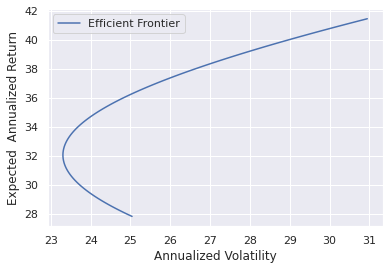

In [102]:
from scipy.optimize import minimize

# Create an array of target portfolio returns for the efficient frontier
target_returns = np.linspace(min(mean_returns), max(mean_returns), num=100)

# Minimize portfolio volatility for each target portfolio return
def portfolio_volatility(weights, mean_returns, cov_matrix, target_return):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility

def portfolio_return_constraint(weights, target_return):
    return np.dot(weights.T, mean_returns) - target_return

efficient_frontier_volatilities = []
for target_return in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, target_return)},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((-1,1) for i in range(n))
    initial_guess = np.ones(n) / n
    result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, target_return), method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_frontier_volatilities.append(result['fun'])

# Plot the efficient frontier
# plt.figure(figsize=(12, 8))
plt.plot(efficient_frontier_volatilities, target_returns, label='Efficient Frontier')
plt.xlabel('Annualized Volatility')
plt.ylabel('Expected  Annualized Return')
plt.legend()


##Optimum Weights for minimum Volatility when shortselling is also allowed

In [103]:
# Find the index of the minimum volatility point on the efficient frontier
min_volatility_idx = np.argmin(efficient_frontier_volatilities)

# Get the corresponding target return
min_volatility_target_return = target_returns[min_volatility_idx]

# Find the optimal weights for the minimum volatility point
constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, min_volatility_target_return)},
               {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

bounds = tuple((-1,1) for i in range(n))
initial_guess = np.ones(n) / n
result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, min_volatility_target_return), method='SLSQP', bounds=bounds, constraints=constraints)
min_volatility_weights = result['x']

# Calculate the corresponding expected return and volatility
min_volatility_return = np.dot(min_volatility_weights.T, mean_returns)
min_volatility = efficient_frontier_volatilities[min_volatility_idx]

# Print the results
print(f"Optimal weights for minimum volatility: {min_volatility_weights}")
print(f"Expected return for minimum volatility: {min_volatility_return:.4f}")
print(f"Volatility for minimum volatility: {min_volatility:.4f}")


Optimal weights for minimum volatility: [ 0.02302571  0.11943518  0.13992599  0.0598116   0.14606081  0.3161618
 -0.03236406  0.09539775  0.05902025  0.07352498]
Expected return for minimum volatility: 32.0781
Volatility for minimum volatility: 23.3031


##Optimum Weights for maximum sharpe ratio when shortselling is also allowed


In [104]:


def sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility
    return -sharpe_ratio

# Find the optimal weights for the maximum Sharpe ratio
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((-1,1) for i in range(n))
initial_guess = np.ones(n) / n
result = minimize(sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix, risk_free_rate), method='SLSQP', bounds=bounds, constraints=constraints)
max_sharpe_weights = result['x']

# Calculate the corresponding expected return and volatility
max_sharpe_return = np.dot(max_sharpe_weights.T, mean_returns)
max_sharpe_volatility = np.sqrt(np.dot(max_sharpe_weights.T, np.dot(cov_matrix, max_sharpe_weights)))
max_sharpe_ratio=(max_sharpe_return-risk_free_rate)/max_sharpe_volatility

# Print the results
print(f"Optimal weights for maximum Sharpe ratio: {max_sharpe_weights}")
print(f"Expected return for maximum Sharpe ratio: {max_sharpe_return:.5f}")
print(f"Volatility for maximum Sharpe ratio: {max_sharpe_volatility:.5f}")
print(f"Maximum Sharpe ratio: {max_sharpe_ratio:.5f}")


Optimal weights for maximum Sharpe ratio: [ 0.13630638  0.10118553  0.12661878 -0.04980428  0.23530932  0.19105983
  0.0193175  -0.01121353  0.02467296  0.22654749]
Expected return for maximum Sharpe ratio: 36.63887
Volatility for maximum Sharpe ratio: 25.34450
Maximum Sharpe ratio: 1.17339


#Comparision


#Shortselling allowed and Monte Carlo and Quadratic

In [105]:

# Define the number of simulations to run
num_portfolios = 100000

# Create an empty array to store the results
results = np.zeros((n+3,num_portfolios))

# Generate random weights and calculate portfolio return and volatility for each simulation
for i in range(num_portfolios):

    weights = np.random.randn(n)
    weights= weights/np.sum(weights)
    weights= np.array(weights)
    # Calculate portfolio return and volatility
    portfolio_return, portfolio_volatility = portfolio_return_volatility(weights, mean_returns, cov_matrix)
    # Store the results
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = (results[0,i]-risk_free_rate) / results[1,i]
    results[3:n+3,i] = weights

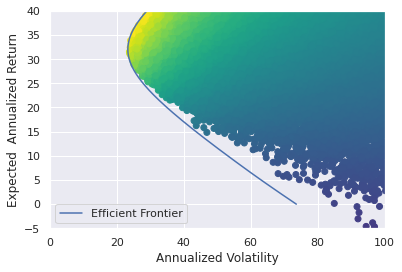

In [106]:
from scipy.optimize import minimize

# Create an array of target portfolio returns for the efficient frontier
target_returns = np.linspace(0,50,num=1000)

# Minimize portfolio volatility for each target portfolio return
def portfolio_volatility(weights, mean_returns, cov_matrix, target_return):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility

def portfolio_return_constraint(weights, target_return):
    return np.dot(weights.T, mean_returns) - target_return

efficient_frontier_volatilities = []
for target_return in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, target_return)},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((-1,1) for i in range(n))
    initial_guess = np.ones(n) / n
    result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, target_return), method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_frontier_volatilities.append(result['fun'])

# Plot the efficient frontier
# plt.figure(figsize=(12, 8))
plt.plot(efficient_frontier_volatilities, target_returns, label='Efficient Frontier')
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.xlim(0, 100)
plt.ylim(-5,40)
plt.xlabel('Annualized Volatility')
plt.ylabel('Expected  Annualized Return')
plt.legend()


# Shortselling Not allowed 

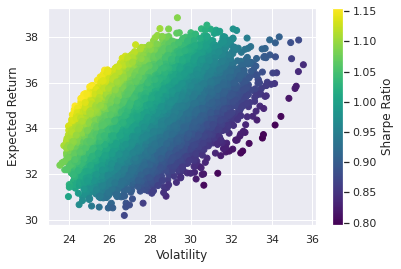

In [107]:


# Define the portfolio_return_volatility() function
def portfolio_return_volatility(weights, mean_returns, cov_matrix):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_return, portfolio_volatility

# Define the number of simulations to run
num_portfolios = 100000

# Create an empty array to store the results
results = np.zeros((n+3,num_portfolios))

# Generate random weights and calculate portfolio return and volatility for each simulation
for i in range(num_portfolios):
    weights = np.random.random(n)
    weights /= np.sum(weights)
    portfolio_return, portfolio_volatility = portfolio_return_volatility(weights, mean_returns, cov_matrix)
    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = (results[0,i] - risk_free_rate )/ results[1,i]
    results[3:n+3,i] = weights



# Plot the results
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label='Sharpe Ratio')
plt.show()




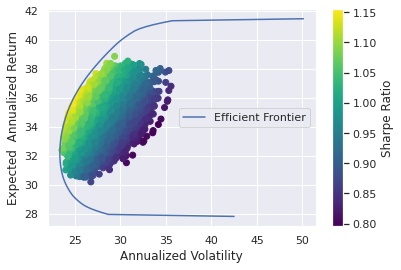

In [108]:
from scipy.optimize import minimize

# Create an array of target portfolio returns for the efficient frontier
target_returns = np.linspace(min(mean_returns), max(mean_returns), num=100)

# Minimize portfolio volatility for each target portfolio return
def portfolio_volatility(weights, mean_returns, cov_matrix, target_return):
    portfolio_return = np.dot(weights.T, mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility

def portfolio_return_constraint(weights, target_return):
    return np.dot(weights.T, mean_returns) - target_return

efficient_frontier_volatilities = []
for target_return in target_returns:
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return_constraint(x, target_return)},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for i in range(n))
    initial_guess = np.ones(n) / n
    result = minimize(portfolio_volatility, initial_guess, args=(mean_returns, cov_matrix, target_return), method='SLSQP', bounds=bounds, constraints=constraints)
    efficient_frontier_volatilities.append(result['fun'])

# Plot the efficient frontier
# plt.figure(figsize=(12, 8))
plt.plot(efficient_frontier_volatilities, target_returns, label='Efficient Frontier')
plt.scatter(results[1,:], results[0,:], c=results[2,:], cmap='viridis')
plt.xlabel('Annualized Volatility')
plt.ylabel('Expected  Annualized Return')
plt.colorbar(label='Sharpe Ratio')
plt.legend()
plt.show()

In [109]:
mark_weights=np.array([0.093079392, 0.20278391, 0.035450551, 0.115770974,
                       0.158724307, 0.063714984, 0.066659536, 0.074273487,
                       0.163909743, 0.025694351])
portfolio_return, portfolio_volatility = portfolio_return_volatility(mark_weights, mean_returns, cov_matrix)
print(mark_weights)
print('portfolio_return',portfolio_return)
print('portfolio_volatality',portfolio_volatility)
print('sharpe ratio',((portfolio_return-risk_free_rate)/portfolio_volatility))

[0.09307939 0.20278391 0.03545055 0.11577097 0.15872431 0.06371498
 0.06665954 0.07427349 0.16390974 0.02569435]
portfolio_return 34.307400806670145
portfolio_volatality 27.396083143459304
sharpe ratio 1.0004131124566815
